This notebook will have the code required to make some of the figures in the paper. 


In [1]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000
import numpy as np 
import os
import sys 
sys.path.append('../../correct_call_annotations')
import correct_call_annotations 
from correct_call_annotations import correct_call_annotations
import pandas as pd
import scipy.io.wavfile as wavfile

In [2]:
%matplotlib notebook

## Figure illustrating the whole-audio analyses

The virtual multi bat files were generated by adding multiple single bat audio files. I also saved the original source audio files. Let's load the data and see which audio combinations looks nice. 

In [3]:
data_folder = '../../annotation_audio_analysis/'
audio_folder = os.path.join('../../','individual_call_analysis/','hp_annotation_audio/')
source_file = os.path.join(data_folder,'source_files_for_virtual_multibat_audio.csv')
source_audio = pd.read_csv(source_file)

In [4]:
def split_into_source_files(string_with_source):
    raw_filenames = string_with_source.split(',')
    # remove single apostrophes
    no_apostrophes = [each.replace("'","") for each in raw_filenames]
    # remove spaces
    no_spaces = [ each.replace(" ", "") for each in no_apostrophes]
    return no_spaces




In [8]:
source_audio_files = split_into_source_files(source_audio['source_single_bat_files'][20])

all_audio = []

for each in source_audio_files:
    matched_audio  = correct_call_annotations.find_file_in_folder(each,
                                                                  audio_folder)
    fs, audio = wavfile.read(matched_audio[0])
    all_audio.append(audio[:,0])



Match found!
Match found!


In [9]:
make_50ms_divs = lambda X,fs: np.arange(0,X.size, int(0.05*fs))

<IPython.core.display.Javascript object>


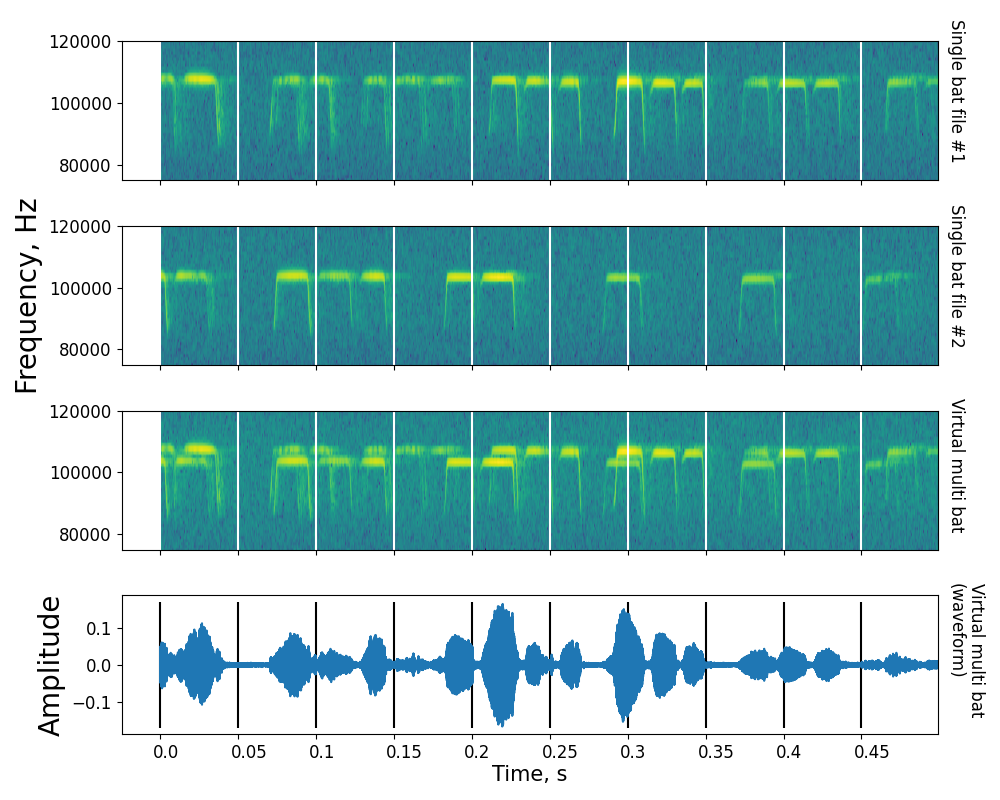

In [70]:
part_audio = [each[:int(0.5*fs)] for each in all_audio]
added_audio = part_audio[0] + part_audio[1]


plt.figure(figsize=(10,8))

a1 = plt.subplot(411)
plt.specgram(part_audio[0], Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(part_audio[0], fs)/fs, 0, fs*0.5,'w')
plt.ylim(75000,120000);
a1.set_xticklabels([])
plt.text(1.01,0.15,'Single bat file #1', rotation=270, fontsize=12, transform=plt.gca().transAxes)

a1.set_xticks(np.arange(0,0.55,0.05))
a1.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(0,0.5)

a2 = plt.subplot(412, sharex=a1)
plt.specgram(part_audio[1], Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(part_audio[1], fs)/fs, 0, fs*0.5,'w')
plt.ylabel('Frequency, Hz', fontsize=20)
plt.ylim(75000,120000)
a2.set_xticklabels([])
plt.text(1.01,0.15,'Single bat file #2', rotation=270, fontsize=12, transform=plt.gca().transAxes)

a2.set_xticks(np.arange(0,0.55,0.05))
a2.tick_params(axis='both', which='major', labelsize=12)


a3=plt.subplot(413, sharex=a1)
plt.specgram(added_audio, Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(added_audio, fs)/fs, 0, fs*0.5,'w')
plt.text(1.01,0.15,'Virtual multi bat', rotation=270, fontsize=12, transform=plt.gca().transAxes)
plt.ylim(75000,120000);
a3.set_xticklabels([])

a3.tick_params(axis='both', which='major', labelsize=12)

a4=plt.subplot(414, sharex=a1)
t = np.linspace(0,added_audio.size/fs, added_audio.size)
normalised_added = added_audio/(-1+2**15)
plt.plot(t, normalised_added);
plt.text(1.01,0.15,'Virtual multi bat\n(waveform)', rotation=270, fontsize=12, transform=plt.gca().transAxes)

timepoints = make_50ms_divs(normalised_added, fs)/fs
plt.ylabel('Amplitude', fontsize=20)
plt.yticks(fontsize=12)
plt.vlines(make_50ms_divs(added_audio, fs)/fs, -0.17 ,.17,'k')
plt.xlabel('Time, s', fontsize=15, labelpad=15)
#lines = np.linspace(0,1,10)1
for each in timepoints:
    plt.text(each-0.005, -0.25,  str(each), fontsize=12)

plt.tight_layout()

plt.savefig('virtual_multibat_schematic.png')